In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
DB2P8 = pd.read_csv("data/DB2P8.csv")
DB5 = pd.read_csv("data/DB5.csv")

DB2P8 = DB2P8[DB5.columns]

new_ids = pd.read_csv("data/new_point_ids.csv")

data = pd.read_csv("data/data.csv")
                  
r = pd.read_csv("data/R.csv")#DB5[DB5.id.isin(new_ids.id.values)] #reintroduce dataset

### Regression on DB2P8 | Coefficients

In [3]:
coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']

y = DB2P8[["TAUTH"]].apply(np.log)
X = DB2P8[coeffs].apply(np.abs).apply(np.log)


regressor = LinearRegression()
regressor.fit(X,y)

v = pd.DataFrame(regressor.coef_, index=["Coefficient"]).transpose()
w = pd.DataFrame(X.columns, columns=["Attribute"])
coeff_DB2P8 = pd.concat([w,v], axis=1, join="inner")

αR_DB2P8 = coeff_DB2P8.loc[4].Coefficient

coeff_DB2P8

,Attribute,Coefficient
0,IP,0.781188
1,BT,0.320077
2,NEL,0.435161
3,PLTH,-0.668186
4,RGEO,2.222962
5,KAREA,0.390074
6,EPS,0.575613
7,MEFF,0.179800


In [4]:
regressor.intercept_

array([-3.00427156])

### Optimization Analysis

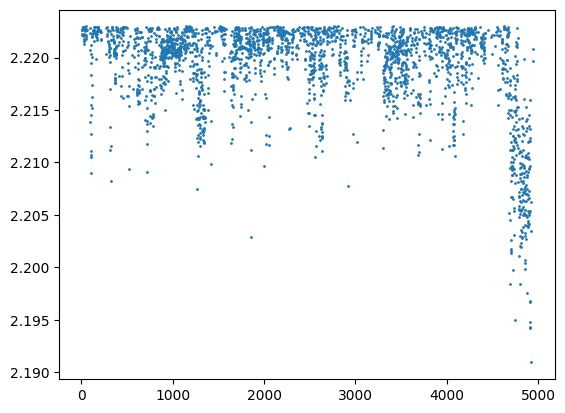

In [5]:
# Leave the ones above baseline out -- because we are interested in the reduction of value
df = data[data.αR < αR_DB2P8]
plt.scatter(df.ind, df.αR, s=1);

In [7]:
df = df.sort_values("αR", ascending=True)
ids = df.id_added.values

dict_ordered_vals = dict(zip( ids, list(range(len(df)))  ) )

r = r[r.id.isin(ids)]
r["ordered"] = r.id.map(dict_ordered_vals)
r = r.sort_values("ordered")
r = r.set_index("ordered")

In [19]:
from IPython.core.debugger import Pdb #Pdb().set_trace()


def compute_reg_aR(reg_data):
    y = reg_data[["TAUTH"]].apply(np.log)
    X = reg_data[coeffs].apply(np.abs).apply(np.log)

    regressor = LinearRegression()
    regressor.fit(X,y)

    v = pd.DataFrame(regressor.coef_, index=["Coefficient"]).transpose()
    w = pd.DataFrame(X.columns, columns=["Attribute"])
    coeff_df = pd.concat([w,v], axis=1, join="inner")
    
    #Pdb().set_trace()
    
    return coeff_df.loc[4]["Coefficient"]

reg_coeff_per_pts = np.zeros(len(df))

for i in range(1, len(df) + 1):
    df1 = DB2P8[["TAUTH"] + coeffs]
    df2 = (r.iloc[:i][["TAUTH"] + coeffs]).apply(np.exp)
    reg_data = pd.concat([df1, df2], axis=0, ignore_index=True)
    reg_coeff_per_pts[i-1] = compute_reg_aR(reg_data)

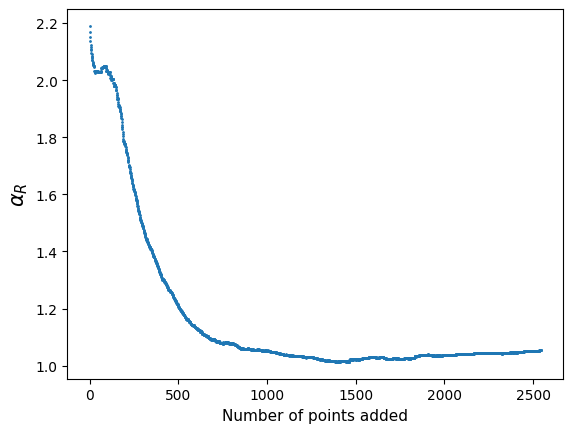

In [20]:
plt.scatter(list(range(1, len(df) + 1)), reg_coeff_per_pts, s=1)
plt.xlabel("Number of points added", fontsize=11)
plt.ylabel("$\\alpha_R$", fontsize=15);